# Data Project - Stock Market Analysis

1.) What was the change in price of the stock over time?

2.) What was the daily return of the stock on average?

3.) What was the moving average of the various stocks?

4.) What was the correlation between different stocks' closing/daily prices?

5.)How much value do we put at risk by investing in a particular stock?

6.) How can we attempt to predict future stock behavior?

### Basic Analysis of Stock Information

In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [14]:
import pandas_datareader as pdr
from datetime import datetime

In [78]:
tech_list = ["AAPL", "GOOG", "MSFT", "AMZN", "TSLA"]

In [79]:
end = datetime.now()

start = datetime(end.year-1, end.month, end.day)

In [80]:
for stock in tech_list:
    globals()[stock] = pdr.get_data_yahoo(stock, start, end)

In [81]:
AAPL

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-15,86.419998,83.144997,83.312500,85.747498,138808800.0,85.173584
2020-06-16,88.300003,86.180000,87.864998,88.019997,165428800.0,87.430885
2020-06-17,88.849998,87.772499,88.787498,87.897499,114406400.0,87.309204
2020-06-18,88.362503,87.305000,87.852501,87.932503,96820400.0,87.343979
2020-06-19,89.139999,86.287498,88.660004,87.430000,264476000.0,86.844833
...,...,...,...,...,...,...
2021-06-08,128.460007,126.209999,126.599998,126.739998,74403800.0,126.739998
2021-06-09,127.750000,126.519997,127.209999,127.129997,56877900.0,127.129997
2021-06-10,128.190002,125.940002,127.019997,126.110001,71186400.0,126.110001


In [82]:
GOOG

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-15,1424.800049,1387.920044,1390.800049,1419.849976,1503900,1419.849976
2020-06-16,1455.020020,1425.900024,1445.219971,1442.719971,1709200,1442.719971
2020-06-17,1460.000000,1431.380005,1447.160034,1451.119995,1549600,1451.119995
2020-06-18,1451.410034,1427.010010,1449.160034,1435.959961,1581900,1435.959961
2020-06-19,1447.800049,1421.349976,1444.000000,1431.719971,3157900,1431.719971
...,...,...,...,...,...,...
2021-06-08,2494.495117,2468.239990,2479.899902,2482.850098,1253000,2482.850098
2021-06-09,2505.000000,2487.330078,2499.500000,2491.399902,1006300,2491.399902
2021-06-10,2523.260010,2494.000000,2494.010010,2521.600098,1561700,2521.600098


In [83]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,121.146012,118.078125,119.720536,119.631379,1.241157e+08,119.238265
std,12.973904,12.776694,12.995021,12.849226,5.375091e+07,12.967736
min,86.419998,83.144997,83.312500,85.747498,4.669130e+07,85.173584
25%,116.000000,112.754999,114.565001,114.939373,8.819405e+07,114.375940
50%,123.739998,120.459999,122.369999,122.009998,1.108886e+08,121.803104
75%,129.812500,126.822498,128.540001,128.132504,1.507137e+08,127.836859
max,145.089996,141.369995,143.600006,143.160004,3.743368e+08,142.704010


In [84]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-06-15 to 2021-06-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    float64
 5   Adj Close  252 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


<AxesSubplot:xlabel='Date'>

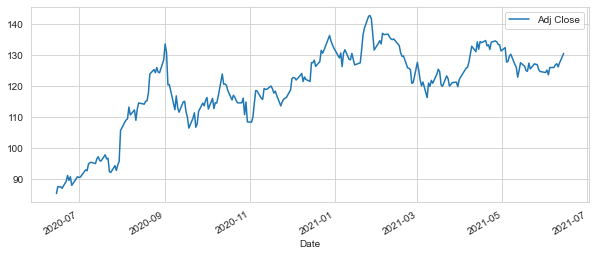

In [85]:
AAPL['Adj Close'].plot(legend=True, figsize=(10, 4))

<AxesSubplot:xlabel='Date'>

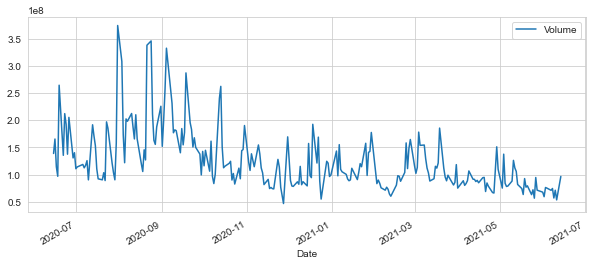

In [86]:
AAPL['Volume'].plot(legend=True, figsize=(10, 4))

Moving average

www.investopedia.com/terms/m/movingaverage.asp

www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

In [87]:
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = f'MA for {str(ma)} days'
    AAPL[column_name] = Series.rolling(AAPL['Adj Close'], ma).mean()

In [88]:
AAPL

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2020-06-15,86.419998,83.144997,83.312500,85.747498,138808800.0,85.173584,NaN,NaN,NaN
2020-06-16,88.300003,86.180000,87.864998,88.019997,165428800.0,87.430885,NaN,NaN,NaN
2020-06-17,88.849998,87.772499,88.787498,87.897499,114406400.0,87.309204,NaN,NaN,NaN
2020-06-18,88.362503,87.305000,87.852501,87.932503,96820400.0,87.343979,NaN,NaN,NaN
2020-06-19,89.139999,86.287498,88.660004,87.430000,264476000.0,86.844833,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-06-08,128.460007,126.209999,126.599998,126.739998,74403800.0,126.739998,125.505000,125.589999,128.248223
2021-06-09,127.750000,126.519997,127.209999,127.129997,56877900.0,127.129997,125.527999,125.650999,128.367140
2021-06-10,128.190002,125.940002,127.019997,126.110001,71186400.0,126.110001,125.453999,125.817999,128.495406


<AxesSubplot:xlabel='Date'>

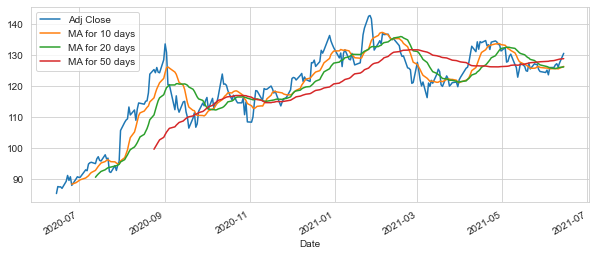

In [89]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots=False, figsize=(10,4))

In [90]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

<AxesSubplot:xlabel='Date'>

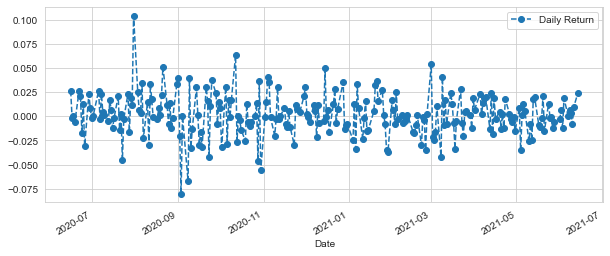

In [91]:
AAPL['Daily Return'].plot(figsize=(10,4), legend=True, linestyle='--', marker='o')

/Users/stevalang/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

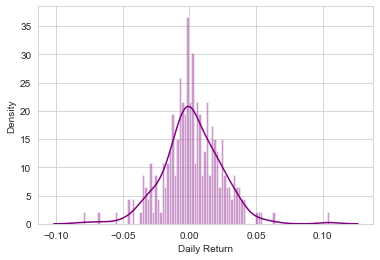

In [92]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

<AxesSubplot:>

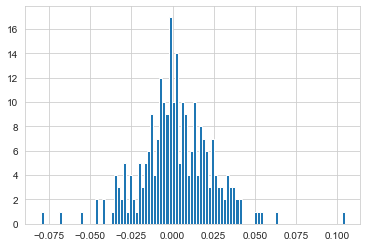

In [93]:
AAPL['Daily Return'].hist(bins=100)

In [94]:
closing_df = pdr.get_data_yahoo(tech_list, start, end)['Adj Close']

In [95]:
closing_df

Symbols,AAPL,GOOG,MSFT,AMZN,TSLA
Date,,,,,
2020-06-15,85.173584,1419.849976,187.128113,2572.679932,198.179993
2020-06-16,87.430885,1442.719971,191.713745,2615.270020,196.425995
2020-06-17,87.309204,1451.119995,192.377289,2640.979980,198.358002
2020-06-18,87.343979,1435.959961,194.437363,2653.979980,200.792007
2020-06-19,86.844833,1431.719971,193.278564,2675.010010,200.179993
...,...,...,...,...,...
2021-06-08,126.739998,2482.850098,252.570007,3264.110107,603.590027
2021-06-09,127.129997,2491.399902,253.589996,3281.149902,598.780029
2021-06-10,126.110001,2521.600098,257.239990,3349.649902,610.119995


In [96]:
tech_rets = closing_df.pct_change()

In [97]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN,TSLA
Date,,,,,
2020-06-15,NaN,NaN,NaN,NaN,NaN
2020-06-16,0.026502,0.016107,0.024505,0.016555,-0.008851
2020-06-17,-0.001392,0.005822,0.003461,0.009831,0.009836
2020-06-18,0.000398,-0.010447,0.010709,0.004922,0.012271
2020-06-19,-0.005715,-0.002953,-0.005960,0.007924,-0.003048


/Users/stevalang/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


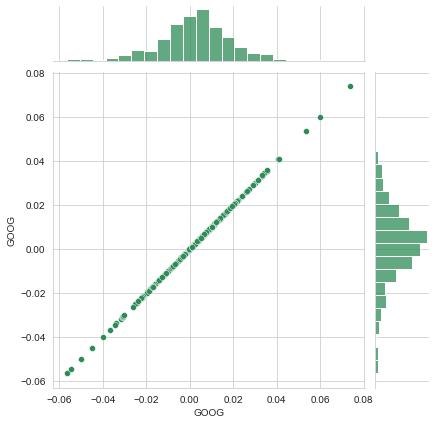

In [98]:
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')

/Users/stevalang/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


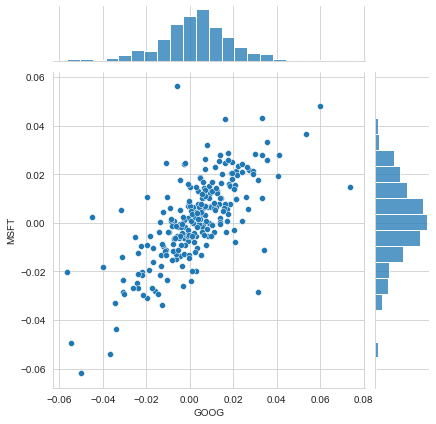

In [99]:
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter')

In [100]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN,TSLA
Date,,,,,
2020-06-15,NaN,NaN,NaN,NaN,NaN
2020-06-16,0.026502,0.016107,0.024505,0.016555,-0.008851
2020-06-17,-0.001392,0.005822,0.003461,0.009831,0.009836
2020-06-18,0.000398,-0.010447,0.010709,0.004922,0.012271
2020-06-19,-0.005715,-0.002953,-0.005960,0.007924,-0.003048


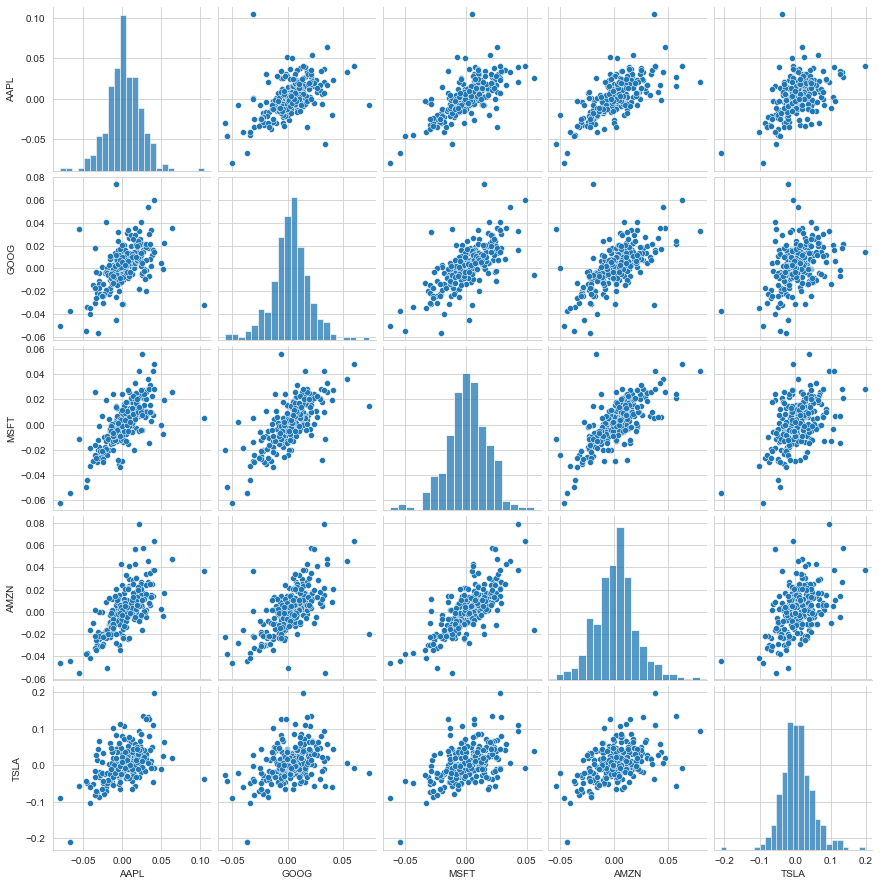

In [101]:
sns.pairplot(tech_rets.dropna())

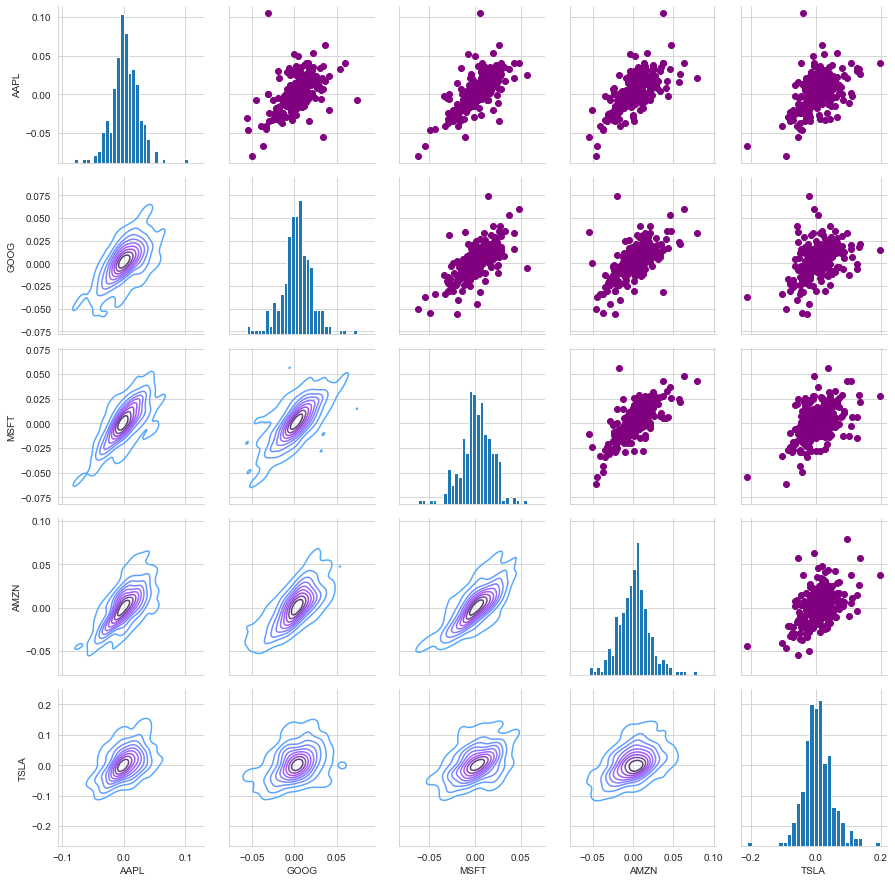

In [102]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

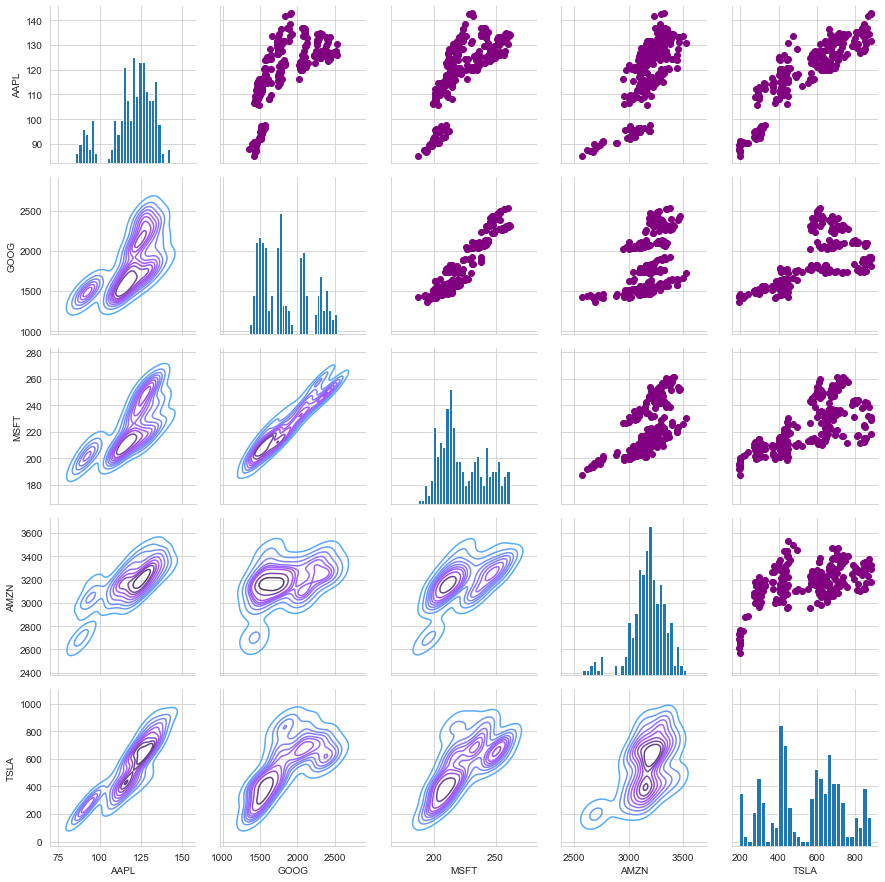

In [103]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

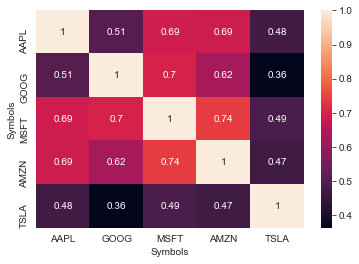

In [104]:
corr = tech_rets.corr()
sns.heatmap(corr, annot=True)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

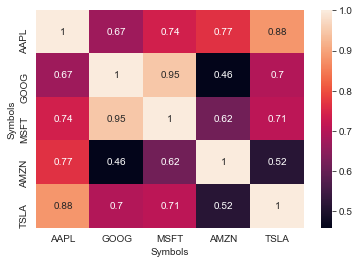

In [105]:
sns.heatmap(closing_df.corr(), annot=True)

## Risk Analysis

In [106]:
rets = tech_rets.dropna()

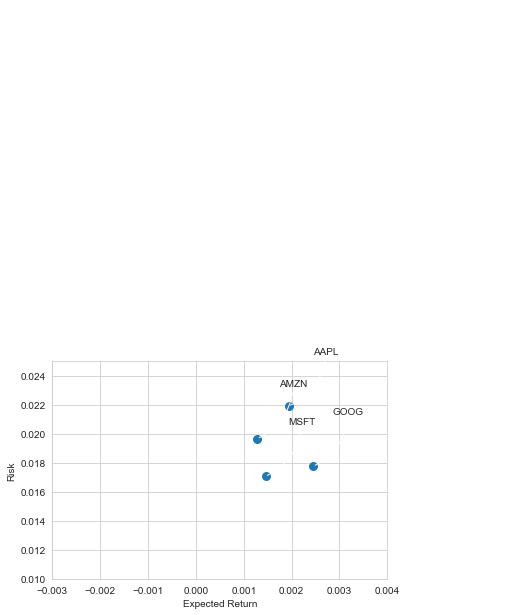

In [107]:
area = np.pi*20

plt.scatter(rets.mean(), rets.std(), s=area)
# Set the x and y limits of the plot
plt.ylim([0.01, 0.025])
plt.xlim([-0.003, 0.004])

# Set th plot axis titles
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
    label,
    xy = (x, y),
    xytext = (50, 50),
    textcoords = 'offset points',
    ha = 'right',
    va = 'bottom',
    arrowprops = dict(arrowstyle = '-',
                      connectionstyle = 'arc3, rad=-0.3'))




## Value at risk using the 'bootstrap' method

/Users/stevalang/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

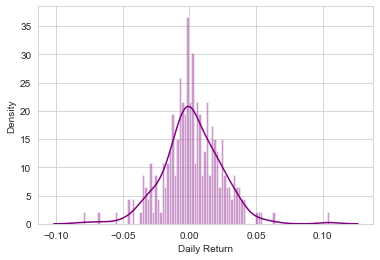

In [108]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

In [109]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN,TSLA
Date,,,,,
2020-06-16,0.026502,0.016107,0.024505,0.016555,-0.008851
2020-06-17,-0.001392,0.005822,0.003461,0.009831,0.009836
2020-06-18,0.000398,-0.010447,0.010709,0.004922,0.012271
2020-06-19,-0.005715,-0.002953,-0.005960,0.007924,-0.003048
2020-06-22,0.026164,0.014067,0.027774,0.014508,-0.006574


In [110]:
rets['TSLA'].quantile(0.05)

-0.058358629618802116

## Monte Carlo

geometric Brownian motion GBM a.k.a Markov process - random walk
efficient market hypothesis EMH

In [111]:
days = 365

dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [116]:
def stock_monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1, days):
        shock[x] = np.random.normal(loc=mu*dt, scale=sigma*np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
    return price

In [113]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-15,1424.800049,1387.920044,1390.800049,1419.849976,1503900,1419.849976
2020-06-16,1455.020020,1425.900024,1445.219971,1442.719971,1709200,1442.719971
2020-06-17,1460.000000,1431.380005,1447.160034,1451.119995,1549600,1451.119995
2020-06-18,1451.410034,1427.010010,1449.160034,1435.959961,1581900,1435.959961
2020-06-19,1447.800049,1421.349976,1444.000000,1431.719971,3157900,1431.719971


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

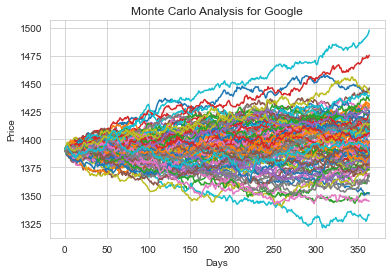

In [117]:
start_price = 1390.92

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [119]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]

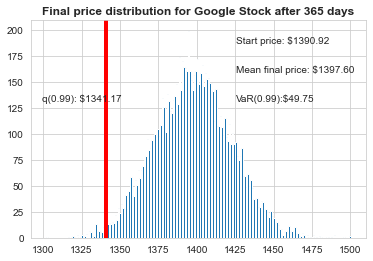

In [125]:
q = np.percentile(simulations, 1)
plt.hist(simulations, bins=200)

# Starting Price
plt.figtext(0.6, 0.8, s='Start price: $%.2f' %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, 'Mean final price: $%.2f' %simulations.mean())
# Variance of the price(within 99% confidence interval)
plt.figtext(0.6, 0.6, 'VaR(0.99):$%.2f' %(start_price -q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

#Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

#Title
plt.title(u'Final price distribution for Google Stock after %s days' %days, weight='bold');
